In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

### Exploring the data

In [3]:
#reading data
#training data
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#test data
test = pd.read_csv("test.csv")
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


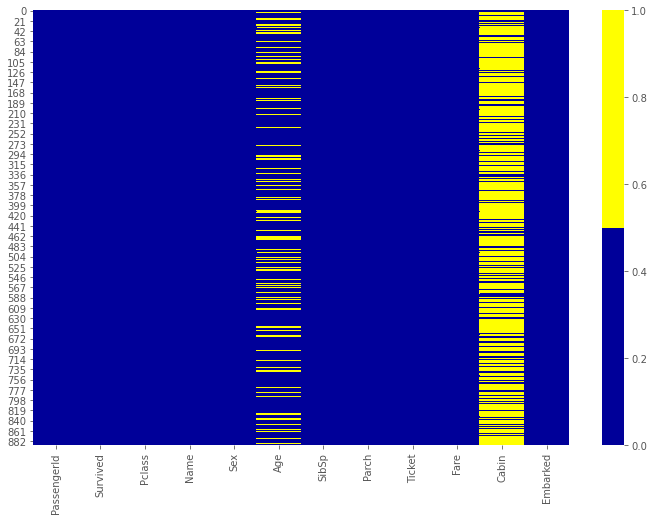

In [5]:
#visualizing missing data
cols = data.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

### Decision 1: How do we handle the missing values?

In [6]:
#looking at some of the values in the Cabin column
data[["Cabin"]].dropna().values[:20]

array([['C85'],
       ['C123'],
       ['E46'],
       ['G6'],
       ['C103'],
       ['D56'],
       ['A6'],
       ['C23 C25 C27'],
       ['B78'],
       ['D33'],
       ['B30'],
       ['C52'],
       ['B28'],
       ['C83'],
       ['F33'],
       ['F G73'],
       ['C23 C25 C27'],
       ['E31'],
       ['A5'],
       ['D10 D12']], dtype=object)

In [7]:
print(len(data[["Cabin"]].dropna().values)) #total number of values different from NA
(unique, counts) = np.unique(data[["Cabin"]].dropna().values, return_counts=True)
print(len(unique)) #number of unique values for Cabin
print(max(counts)) #highest frquency of a value in the Cabin column

204
147
4


In [8]:
data.drop(["Cabin"],inplace=True,axis=1) #drop Cabin column

In [9]:
#calculate proportion of missing values for Age column
len(data[data["Age"].isnull()])/len(data)

0.19865319865319866

In [10]:
#now let's explore the Age column for values that have NA
data[data["Age"].isnull()].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,C


In [11]:
#fraction of survivors among the missing age group
np.sum(data[data["Age"].isnull()]["Survived"])/len(data[data["Age"].isnull()])

0.2937853107344633

In [12]:
#fraction of survivors among the NOT missing age group
np.sum(data.dropna()["Survived"])/len(data.dropna())

0.4044943820224719

In [13]:
#fraction of survivors in total
np.sum(data["Survived"])/len(data)

0.3838383838383838

In [14]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


In [15]:
data = data[data.Age.notna()]

In [16]:
data.replace({'male': 1, 'female': 0}, inplace=True)
test.replace({'male': 1, 'female': 0}, inplace=True) #remember to perform the same formatting on our test data

In [17]:
data.Ticket[:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
18              345763
20              239865
21              248698
22              330923
Name: Ticket, dtype: object

In [18]:
(unique, counts) = np.unique(data[["Ticket"]].dropna().values, return_counts=True)
print(len(unique)) #number of unique values for Tikcet
print(max(counts)) #highest frquency of a value in the Ticket column

542
7


In [19]:
data.Embarked[:20]

0     S
1     C
2     S
3     S
4     S
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
18    S
20    S
21    S
22    Q
Name: Embarked, dtype: object

In [20]:
(unique, counts) = np.unique(data[["Embarked"]].dropna().values, return_counts=True)
print(unique,counts) #number of unique values for Embarked

['C' 'Q' 'S'] [130  28 554]


In [21]:
dummy_columns = pd.get_dummies(data.Embarked)
data = pd.concat([data,dummy_columns], axis=1)

#we do the same with test data
dummy_columns_test = pd.get_dummies(test.Embarked)
test = pd.concat([test,dummy_columns_test], axis=1)

In [22]:
relevant_columns = ['Pclass', 'Age', 'Sex','SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Survived']
X_train = data[relevant_columns[:-1]] #keep only relevant columns
y_train = data[relevant_columns[-1]] #outcome variable
X_test = test[relevant_columns[:-1]] #same but without "Survived" that is not provided for test data

### Decision 3: Choosing a model

In [23]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [24]:
#makes results replicable
np.random.seed(123)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
def conf95_acc(clf,X,y):
    scores = cross_val_score(clf,X,y)
    return (scores.mean(), scores.std() * 2)

In [27]:
import heapq
from heapq import heappush, heappop

### Linear SVC

In [33]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC

In [28]:
#hypertuning hyperparameter C
Cs = [10**(i) for i in range(-5,5)]

#the next three lines suppress convergence warning when training the LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

results = [] #array to store the results of each LinearSVC
for c in Cs:
    clf = LinearSVC(C=c)
    acc = conf95_acc(clf,X_train,y_train)+tuple([c])
    heappush(results,acc)

heapq.nlargest(6,results)

[(0.781552250566335, 0.05774436802918215, 0.1),
 (0.7802028956958533, 0.09367633932734165, 0.01),
 (0.7268295085196493, 0.12786049755761553, 1),
 (0.7031123805771693, 0.07796942252495534, 10),
 (0.6975573722052595, 0.1772206621874001, 10000),
 (0.6975179749827638, 0.10587944724617235, 0.001)]

### GaussianNB

In [32]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
from sklearn.naive_bayes import GaussianNB

#no hyperparameters to tune
clf = GaussianNB()
mean,std = conf95_acc(clf,X_train,y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))


Accuracy: 0.76 (+/- 0.20)


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [31]:
#hypertuning hyperparameter C and penalty
Cs = [10**(i) for i in range(-5,6)]

results = [] #array to store the results of each LinearSVC
for c in Cs:
    #for the solver I chose liblinear since, according to sklearn's documentation,
    #this is a good solver for small datasets
    
    clf = LogisticRegression(C=c, solver='liblinear') 
    acc = conf95_acc(clf,X_train,y_train)+tuple([c])
    heappush(results,acc)

heapq.nlargest(6,results)

[(0.7829705505761844, 0.07909511235416113, 100000),
 (0.7829705505761844, 0.07909511235416113, 10000),
 (0.7829705505761844, 0.07909511235416113, 1000),
 (0.7829705505761844, 0.07909511235416113, 100),
 (0.7829705505761844, 0.07909511235416113, 10),
 (0.781591647788831, 0.08488131358147924, 0.1)]

### SVM with kernel = 'rbf'

In [30]:
from sklearn.svm import SVC

In [33]:
#hypertuning hyperparameter C and gamma
Cs = [10**(i) for i in range(-5,5)]
gammas = [10**(i) for i in range(-5,5)]


results = [] #array to store the results of each LinearSVC
for c in Cs:
    for gamma in gammas:
        clf = SVC(C=c, gamma=gamma, kernel='rbf')
        acc = conf95_acc(clf,X_train,y_train)+tuple([c,gamma])
        heappush(results,acc)

heapq.nlargest(6,results)

[(0.792810006894514, 0.09245837341640116, 10000, 0.0001),
 (0.7871959026888604, 0.09862200561091403, 1000, 0.0001),
 (0.7857776026790111, 0.07836958242634294, 100, 0.001),
 (0.7830197971043041, 0.07835096313597831, 10000, 0.001),
 (0.7816211957057029, 0.08242520389398579, 1000, 0.001),
 (0.7731507928691027, 0.06604476397361568, 10000, 1e-05)]

### Final testing

In [34]:
#for the test set we cannot delete the NAs since we need to give
#predictions for all passengers in this set
X_test.isnull().any()

Pclass    False
Age        True
Sex       False
SibSp     False
Parch     False
Fare       True
C         False
Q         False
S         False
dtype: bool

In [28]:
#we will fill in the missing values with the average of their corresponding columns
X_test.Age = X_test.Age.fillna(np.mean(X_test.Age))
X_test.Fare = X_test.Fare.fillna(np.mean(X_test.Fare))

In [34]:
#we export all the predictions to csv file since this is the format
#for Kaggle submissions
linearSVC = LinearSVC(C=0.01)
gaussianNB = GaussianNB()
logreg = LogisticRegression(C=1000, solver ='liblinear')
svc_rbf = SVC(C=1000000, gamma=0.00001, kernel='rbf')
models = [linearSVC,gaussianNB,logreg,svc_rbf]
filenames = ['linearSVC', 'gaussianNB' ,' logreg' ,'svc_rbf']

for i in range(4):
    model = models[i]
    filename = filenames[i]+'.csv'
    model.fit(X_train,y_train)
    #formating output according to Kaggle
    predictions = model.predict(X_test)
    prediction_df = pd.DataFrame(predictions, columns =['Survived'])
    prediction_df.set_index(test.PassengerId, inplace=True)
    prediction_df.to_csv(filename)

/Users/juan/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [37]:
import shap
explainer = shap.LinearExplainer(logreg, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
# X_test_array = X_test.toarray() 

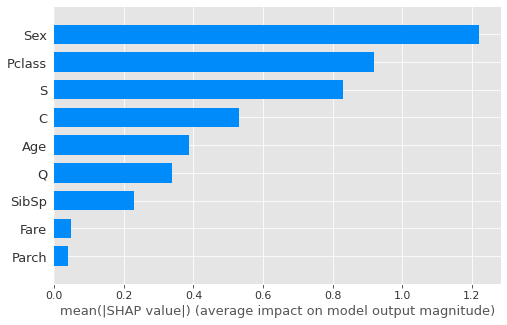

In [38]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

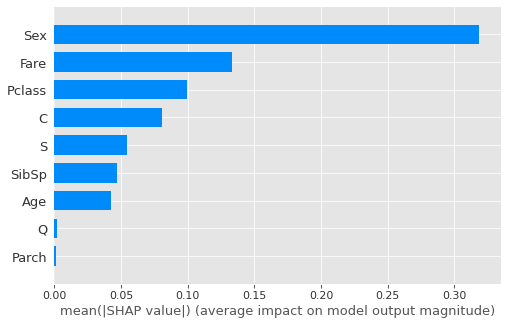

In [43]:
explainer = shap.LinearExplainer(linearSVC, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [44]:
explainer = shap.LinearExplainer(gaussianNB, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

Exception: An unknown model type was passed: <class 'sklearn.naive_bayes.GaussianNB'>